In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:

!kaggle datasets download -d drscarlat/melanoma

Dataset URL: https://www.kaggle.com/datasets/drscarlat/melanoma
License(s): unknown
100% 5.25G/5.26G [01:02<00:00, 100MB/s]
100% 5.26G/5.26G [01:02<00:00, 90.6MB/s]


In [ ]:
# prompt: code for unziping file
import zipfile
zip_ref=zipfile.ZipFile('/content/melanoma.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

In [ ]:
import os
import shutil

# Function to remove .ipynb_checkpoints folder from a directory
def remove_checkpoints(directory):
    for root, dirs, files in os.walk(directory):
        if '.ipynb_checkpoints' in dirs:
            # Remove the folder
            shutil.rmtree(os.path.join(root, '.ipynb_checkpoints'))
            print(f"Removed: {os.path.join(root, '.ipynb_checkpoints')}")

# Paths to your train and test directories
train_dir = '/content/DermMel/train_sep'
test_dir = '/content/DermMel/test'

# Remove .ipynb_checkpoints from both directories
remove_checkpoints(train_dir)
remove_checkpoints(test_dir)


Removed: /content/DermMel/train_sep/.ipynb_checkpoints
Removed: /content/DermMel/test/.ipynb_checkpoints


In [ ]:
# Load and Preprocess the Dataset
train_dir = '/content/DermMel/train_sep'  # replace with your training directory path
test_dir = '/content/DermMel/test'    # replace with your test/validation directory path

# Image Data Generators for Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
# Load MobileNetV2 with pre-trained ImageNet weights, excluding the top (classification) layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezing the base_model to retain pre-trained weights
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add custom layers on top of MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


334/334 ━━━━━━━━━━━━━━━━━━━━ 282s 768ms/step - accuracy: 0.8363 - loss: 0.3873 - val_accuracy: 0.9219 - val_loss: 0.2626
Epoch 2/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 209s 614ms/step - accuracy: 0.9243 - loss: 0.1949 - val_accuracy: 0.9247 - val_loss: 0.2464
Epoch 3/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 261s 614ms/step - accuracy: 0.9339 - loss: 0.1704 - val_accuracy: 0.9172 - val_loss: 0.2607
Epoch 4/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 212s 627ms/step - accuracy: 0.9360 - loss: 0.1673 - val_accuracy: 0.9281 - val_loss: 0.2002
Epoch 5/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 216s 489ms/step - accuracy: 0.9364 - loss: 0.1613 - val_accuracy: 0.9273 - val_loss: 0.2149
Epoch 6/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 161s 475ms/step - accuracy: 0.9372 - loss: 0.1556 - val_accuracy: 0.9281 - val_loss: 0.2106
Epoch 7/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 202s 474ms/step - accuracy: 0.9402 - loss: 0.1505 - val_accuracy: 0.9239 - val_loss: 0.2158
Epoch 8/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 161s 472ms/step - accuracy: 0.9456 - loss: 0.14

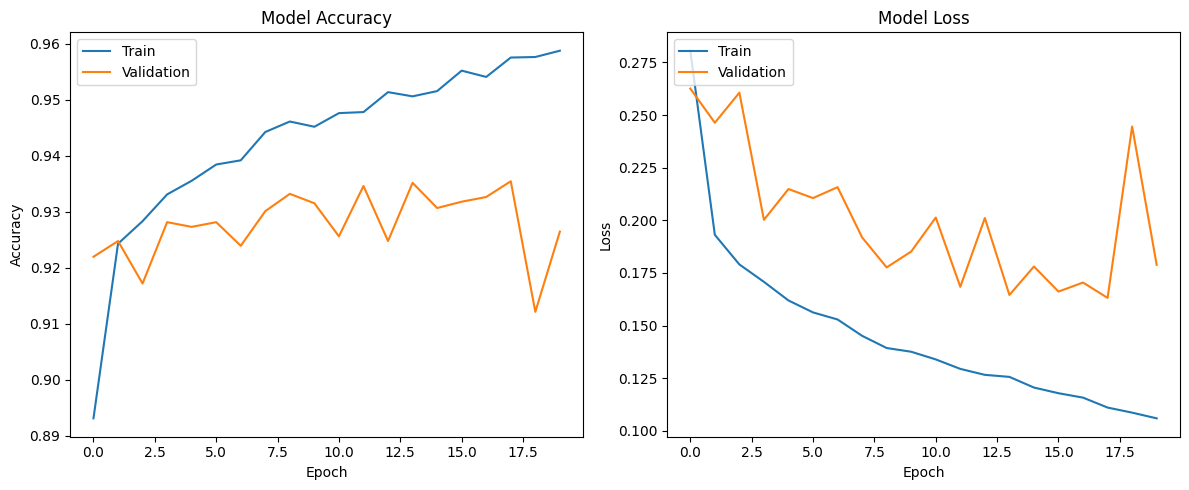

In [ ]:
# Plot accuracy and loss over time
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.9227 - loss: 0.1833
Test Accuracy: 92.64%


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,774,853 (10.59 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 344,580 (1.31 MB)

In [ ]:
model.save('MobileNetv2(2).h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


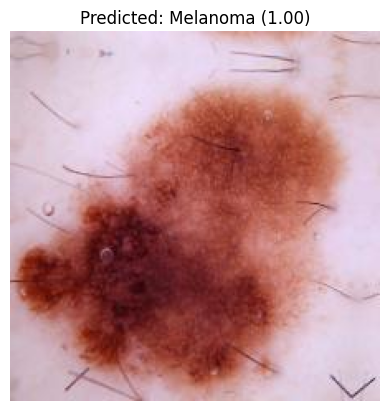

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to predict and show unseen images one by one
def predict_unseen_images(model, image_folder):
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Preprocess the image

        # Predict the class (0 = Non-Melanoma, 1 = Melanoma)
        prediction = model.predict(img_array)
        predicted_class = 'Melanoma' if prediction > 0.5 else 'Non-Melanoma'
        predicted_value = prediction[0][0]

        # Display the image
        plt.imshow(image.load_img(img_path))
        plt.axis('off')  # Hide axes
        plt.title(f"Predicted: {predicted_class} ({predicted_value:.2f})")
        plt.show()

        # Option to continue to the next image or break
        user_input = input("Press Enter to see the next image or type 'q' to quit: ")
        if user_input.lower() == 'q':
            break

# Predict on unseen images
unseen_images_folder = '/content/DermMel/valid/Malignant'  # Replace with the folder path containing unseen images
predict_unseen_images(model, unseen_images_folder)
